In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
#Importing Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [8]:
import pandas as pd

file_path = '/content/drive/MyDrive/AI_work/CodeSoft/car_purchasing.csv'

# Attempt to read the file with a different encoding
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError:
    # If ISO-8859-1 doesn't work, you can try another encoding like 'cp1252'
    data = pd.read_csv(file_path, encoding='cp1252')

# Display the first few rows of the data
print(data.head())


     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773      

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [13]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [9]:
# Dropping specified columns
data_modified = data.drop(['customer e-mail', 'customer name', 'country'], axis=1)

# Extracting 'car purchase amount' into a separate variable
car_purchase_amount = data['car purchase amount']

In [18]:
# Calculate correlations
correlation_matrix = data_modified.corr()

# Display the correlation matrix
print(correlation_matrix)


                       gender       age  annual Salary  credit card debt  \
gender               1.000000 -0.064481      -0.036499          0.024193   
age                 -0.064481  1.000000       0.000130          0.034721   
annual Salary       -0.036499  0.000130       1.000000          0.049599   
credit card debt     0.024193  0.034721       0.049599          1.000000   
net worth           -0.008395  0.020356       0.014767         -0.049378   
car purchase amount -0.066408  0.632865       0.617862          0.028882   

                     net worth  car purchase amount  
gender               -0.008395            -0.066408  
age                   0.020356             0.632865  
annual Salary         0.014767             0.617862  
credit card debt     -0.049378             0.028882  
net worth             1.000000             0.488580  
car purchase amount   0.488580             1.000000  


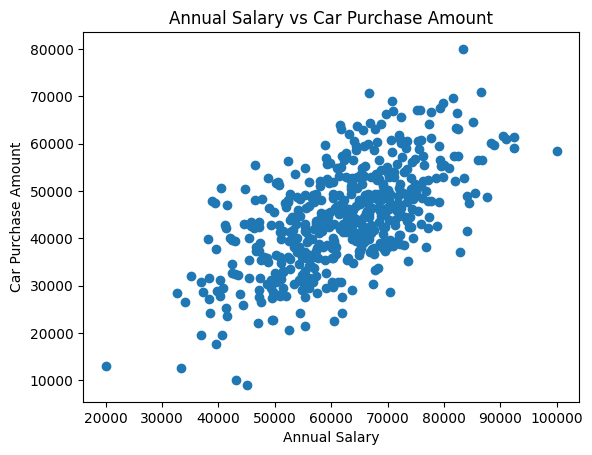

In [17]:
# Plotting 'annual salary' vs 'car purchase amount'
plt.scatter(data_modified['annual Salary'], car_purchase_amount)
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.title('Annual Salary vs Car Purchase Amount')
plt.show()

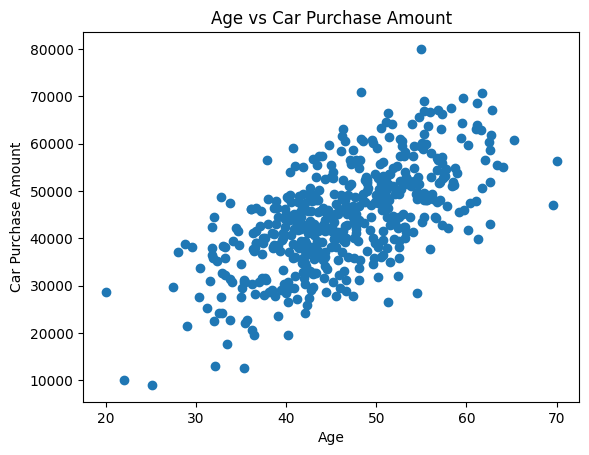

In [19]:
# Plotting 'age' vs 'car purchase amount'
plt.scatter(data_modified['age'], car_purchase_amount)
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.title('Age vs Car Purchase Amount')
plt.show()

In [21]:
# Independent Variables (Features)
X = data_modified.drop('car purchase amount', axis=1)

# Dependent Variable (Target)
y = data_modified['car purchase amount']

In [23]:
X

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [24]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

In [25]:
#Spliting data in train,test,split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
#Training

# Create the decision tree regressor
dtree = DecisionTreeRegressor()

# Fit the model to the training data
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [41]:
#Score on test data
DTree_Score=dtree.score(x_test,y_test)
DTree_Score

0.8185005076648355

In [34]:
#Score on train data

dtree.score(x_train,y_train)

1.0

In [35]:
#Prediction of test set
y_pred = dtree.predict(x_test)
y_pred

array([34139.6373 , 49568.47685, 39888.59789, 41104.07108, 46643.26581,
       42773.75905, 38545.80328, 44387.58412, 32478.44758, 27586.20078,
       37348.13737, 59625.02618, 47984.42062, 45112.94547, 47984.12043,
       54827.52403, 57303.87131, 39422.79389, 47009.57741, 50937.93844,
       51551.67997, 58235.41454, 44525.02085, 42592.88647, 37947.85125,
       27625.44144, 36543.93642, 35848.82935, 48025.02542, 41489.64123,
       45805.67186, 38502.42392, 49392.8897 , 36112.79346, 48622.66097,
       60865.76396, 30419.8    , 36125.48846, 55125.93237, 54755.42038,
       42497.72862, 50441.62427, 30757.65726, 39410.4616 , 36086.93161,
       48100.29052, 38174.87433, 35848.82935, 49510.03356, 39439.45349,
       34139.6373 , 37348.13737, 37744.54285, 47984.42062, 39911.6116 ,
       64545.16339, 44525.02085, 55420.56668, 53110.88052, 66363.89316,
       34678.83226, 47715.96049, 45271.46081, 57303.87131, 37183.10293,
       62028.71192, 45078.40193, 20653.21409, 42909.27129, 31491

In [36]:
#Comparing actual and predicted values

actual_pred=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_pred.head()

,Target,Predicted
432,35475.00344,34139.63730
28,58350.31809,49568.47685
181,39331.20127,39888.59789
133,40077.57289,41104.07108
110,49142.51174,46643.26581


In [42]:
results=pd.DataFrame({
    "Decision Tree": (DTree_Score*100),
},index=['Score'])

In [43]:
results


,Decision Tree
Score,81.850051


<Axes: >

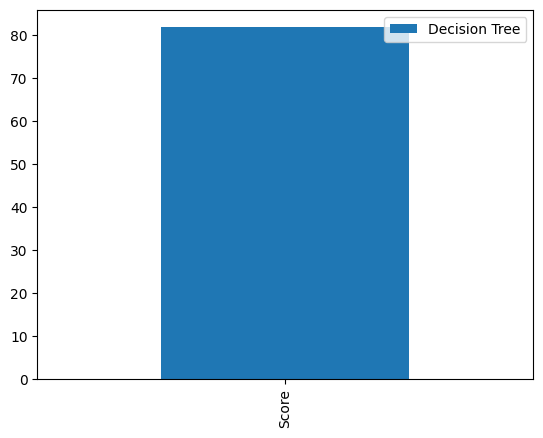

In [44]:
results.plot(kind='bar')
